In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import gzip
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import datetime
import os
from tqdm import tqdm_notebook as tqdm
from helpers import *
rcParams['figure.figsize']=(15, 5)
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
DATA_DIR = 'data/'
PRODUCTS_FILE = 'products_lauch_df'
PRODUCTS_PER_MONTH = 'products_per_month_df'

In [3]:
products_lauch = load_products_lauch(PRODUCTS_FILE)

Computing file...


A Jupyter Widget


skipped 1 rows because of KeyError (not present) or ValueError (not parsable)


In [24]:
products_lauch.head()

,asin,Date
828125,0140146687,1996-05-20 02:00:00
845839,0195038630,1996-05-31 02:00:00
1464073,0816612420,1996-06-16 02:00:00
1554254,0876851898,1996-06-21 02:00:00
1039933,044651862X,1996-06-25 02:00:00


In [9]:
count_products = products_lauch.groupby('Date').count()
count_products['Total'] = count_products.asin.cumsum()
count_products.head()

,asin,Total
Date,,
1996-05-20 02:00:00,1,1
1996-05-31 02:00:00,1,2
1996-06-16 02:00:00,1,3
1996-06-21 02:00:00,1,4
1996-06-25 02:00:00,1,5


Text(0,0.5,'# of new products')

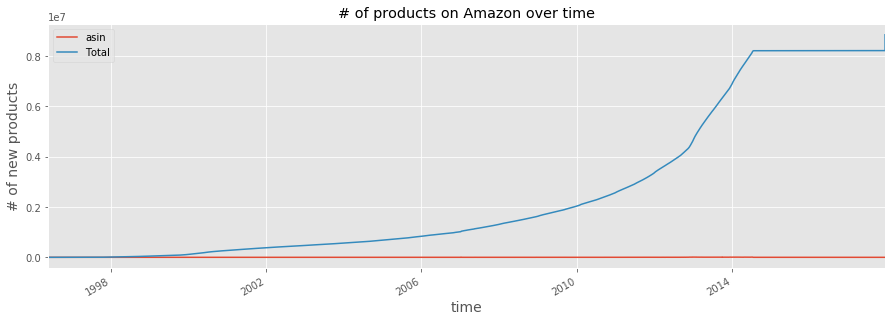

In [10]:
count_products.to_pickle(DATA_DIR + PRODUCTS_PER_MONTH)
count_products.plot(title='# of products on Amazon over time')
plt.xlabel('time', fontsize=14)
plt.ylabel('# of new products', fontsize=14)

In [79]:
# Food
sports_meta_df = pd.read_pickle(DATA_DIR + 'sports_meta_df')
food_meta_df = pd.read_pickle(DATA_DIR + 'food_meta_df')

In [80]:
food_meta_df = add_lauch_date(products_lauch, food_meta_df)
food_meta_df.head()

                          Date
asin                          
B00004S1C5 2000-08-09 02:00:00
B00004TBB0 2000-12-05 01:00:00
B00005AS53 2001-07-05 02:00:00
B000052YEH 2002-01-07 01:00:00
B00006IDJZ 2002-10-29 01:00:00


,asin,description,title,imUrl,related,salesRank,categories,price,brand,Lauched
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,NaN,2013-10-11 02:00:00
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,NaN,2012-12-06 01:00:00
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,NaN,2011-06-12 02:00:00
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,NaN,2012-03-24 01:00:00
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio,2013-03-03 01:00:00


In [63]:
food_meta_df = food_meta_df.set_index('asin')
food_meta_df['Lauched'] = products_lauch[products_lauch.asin.isin(['0657745316','0700026444'])].set_index('asin')
food_meta_df.reset_index().head()

,asin,description,title,imUrl,related,salesRank,categories,price,brand,Lauched
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,NaN,2013-10-11 02:00:00
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,NaN,2012-12-06 01:00:00
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,NaN,NaT
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,NaN,NaT
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio,NaT


In [59]:
food_meta_df.head()

,asin,description,title,imUrl,related,salesRank,categories,price,brand,Lauched
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,NaN,NaT
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,NaN,NaT
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,NaN,NaT
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,NaN,NaT
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio,NaT
